In [2]:
pip install summa

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 670.8 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54388 sha256=c031dd1a9eec684f035fa77583b7de647bab2731d6538dd498f5049f13d84cdf
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa
Note: you may need to restart the kernel to use updated packages.


In [3]:
from importlib.metadata import version
import nltk
import tensorflow
import pandas as pd
import summa

print(nltk.__version__)
print(tensorflow.__version__)
print(pd.__version__)
print(version('summa'))

3.2.4
2.15.0
2.2.2
1.2.0


In [4]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
=3


In [174]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [175]:
data.sample(10)

,headlines,text
45951,Sridevi maintained her dignity in a demanding ...,"Filmmaker Subhash Ghai, while condoling the de..."
23945,"28% GST rate added the Excise, VAT & CST: Ex-F...",Former Finance Minister P Chidambaram has said...
41170,Kim Jong-un attends first South Korean concert,North Korean leader Kim Jong-un on Sunday beca...
61775,"Amazon focused on customers, not competitors: ...","CEO of Amazon Worldwide Consumer, Jeffrey Wilk..."
78800,No more permissions for casinos in Goa: CM Par...,Goa Chief Minister Manohar Parrikar has clarif...
22747,Received 60% return on sale of stake in Flipka...,Japan's SoftBank Group on Monday reported its ...
70089,Govt planning to link Driving Licence to Aadhaar,Union Information Technology Minister Ravi Sha...
8607,Bollywood celebs pay tribute to Mumbai terror ...,Bollywood celebrities took to social media and...
97237,AIIMS doctors wear helmets to work over Maha d...,"Around 1,200 junior doctors turned up wearing ..."
78642,Grand Alliance will choose new Bihar Chief Min...,During a press conference after Bihar Chief Mi...


In [176]:
# 중복 확인
print('총 데이터 개수 :', len(data))
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

총 데이터 개수 : 98401
text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [177]:
# 중복 제거
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


In [178]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [179]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [180]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [181]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

=3


In [182]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [183]:
from tqdm import tqdm

# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
clean_text = []

# for i in data.index:
#     data.loc[i, 'text'] = preprocess_sentence(data.loc[i, 'text'])

for i in tqdm(data.index, desc="Preprocessing Summary"):
    clean_text.append(preprocess_sentence(data.loc[i, 'text']))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])
len(clean_text)



Preprocessing Summary: 100%|██████████| 98360/98360 [13:18<00:00, 123.14it/s]

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

98360

In [184]:
from tqdm import tqdm

# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
clean_summary = []

# [[YOUR CODE]]
# tqdm을 사용하여 진행 상황 표시
for i in tqdm(data.index, desc="Preprocessing headlines"):
    clean_summary.append(preprocess_sentence(data.loc[i, 'headlines'], False))

print("headlines 전처리 후 결과: ", clean_summary[:5])

Preprocessing headlines:   0%|          | 378/98360 [00:00<00:25, 3778.43it/s]/tmp/ipykernel_34/2884123602.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
Preprocessing headlines: 100%|██████████| 98360/98360 [00:24<00:00, 3986.96it/s]

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


In [185]:
data['text'] = clean_text
data['headlines'] = clean_summary

In [186]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [187]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


필요 없는 단어를 모두 솎아낸 데이터를 가지게 되었으니, 이제 훈련에 사용할 샘플의 최대 길이를 정해줄 차례에요.

Text와 Summary의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화해서 볼게요.

0        upgrad learner switches to career in ml al wit...
1        delhi techie wins free food from swiggy for on...
2        new zealand end rohit sharma led india match w...
3        aegon life iterm insurance plan helps customer...
4        have known hirani for yrs what if metoo claims...
                               ...                        
98396    crpf jawan axed to death by maoists in chhatti...
98397    first song from sonakshi sinha noor titled uff...
98398                the matrix film to get reboot reports
98399    snoop dogg aims gun at clown dressed as trump ...
98400    madhesi morcha withdraws support to nepalese g...
Name: headlines, Length: 98360, dtype: object
텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


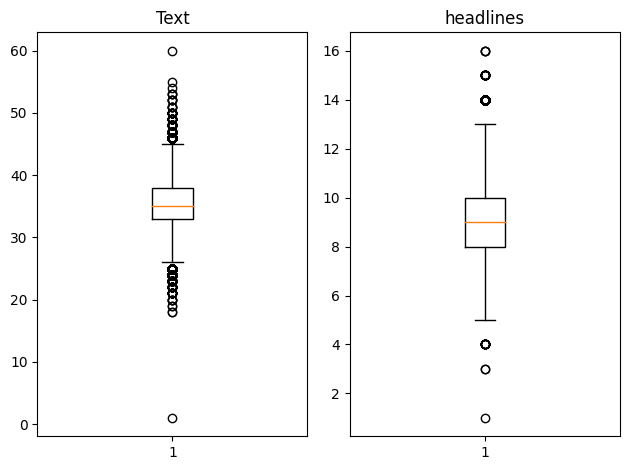

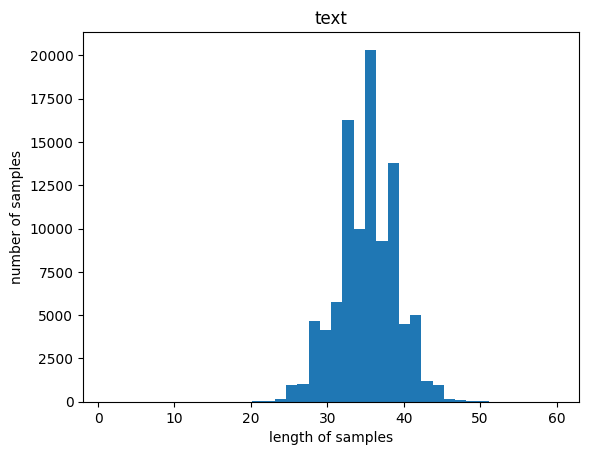

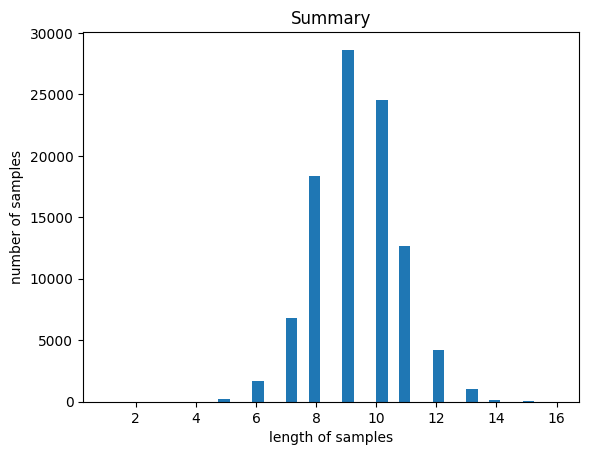

In [188]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
print(data['headlines'])
summary_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [189]:
text_max_len = 43
headline_max_len = 12
print('=3')

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

below_threshold_len(text_max_len, data['text'])
below_threshold_len(headline_max_len,  data['headlines'])

=3
=3
전체 샘플 중 길이가 43 이하인 샘플의 비율: 0.9871797478649857
전체 샘플 중 길이가 12 이하인 샘플의 비율: 0.9880337535583571


In [190]:
def tokenized_len(text):
    return len(text.split())

# 토큰화된 길이 분포 확인
token_lengths = data['text'].apply(tokenized_len)
print("토큰화된 텍스트 길이 통계:")
print(token_lengths.describe())

# 적절한 max_len 값 제안 (예: 95 퍼센타일)
suggested_max_len = int(token_lengths.quantile(0.99))
print(f"\n제안된 max_len 값: {suggested_max_len}")

# 새로운 max_len 값으로 필터링
filtered_data = data[data['text'].apply(lambda x: tokenized_len(x) <= suggested_max_len)]
print(f"\n필터링 후 남은 행 수: {len(filtered_data)}")

# below_threshold_len 함수를 사용한 분석
def below_threshold_len(max_len, nested_list):
    cnt = sum(1 for s in nested_list if len(s.split()) <= max_len)
    print(f'전체 샘플 중 길이가 {max_len} 이하인 샘플의 비율: {cnt / len(nested_list):.2f}')

below_threshold_len(suggested_max_len, data['text'])

토큰화된 텍스트 길이 통계:
count    98360.000000
mean        35.099685
std          3.799406
min          1.000000
25%         33.000000
50%         35.000000
75%         38.000000
max         60.000000
Name: text, dtype: float64

제안된 max_len 값: 44

필터링 후 남은 행 수: 97708
전체 샘플 중 길이가 44 이하인 샘플의 비율: 0.99


In [191]:
def tokenized_len(text):
    return len(text.split())

filtered_data = data[data['text'].apply(lambda x: tokenized_len(x) <= text_max_len)]

# 필터링 결과 확인
print(f"원본 데이터 크기: {len(data)}")
print(f"필터링 후 데이터 크기: {len(filtered_data)}")

원본 데이터 크기: 98360
필터링 후 데이터 크기: 97099


In [192]:
df = data[data['headlines'].apply(lambda x: tokenized_len(x) <= headline_max_len)]

# 필터링 결과 확인
print(f"원본 데이터 크기: {len(data)}")
print(f"필터링 후 데이터 크기: {len(filtered_data)}")

원본 데이터 크기: 98360
필터링 후 데이터 크기: 97099


In [193]:
df

,headlines,text
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...
...,...,...
98396,crpf jawan axed to death by maoists in chhatti...,crpf jawan tuesday axed death sharp edged weap...
98397,first song from sonakshi sinha noor titled uff...,uff yeh first song sonakshi sinha starrer upco...
98398,the matrix film to get reboot reports,according reports new version science fiction ...
98399,snoop dogg aims gun at clown dressed as trump ...,new music video shows rapper snoop dogg aiming...


In [194]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
df['decoder_input'] = df['headlines'].apply(lambda x : 'sostoken '+ x)
df['decoder_target'] = df['headlines'].apply(lambda x : x + ' eostoken')
df.head()

/tmp/ipykernel_34/32008424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decoder_input'] = df['headlines'].apply(lambda x : 'sostoken '+ x)
/tmp/ipykernel_34/32008424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decoder_target'] = df['headlines'].apply(lambda x : x + ' eostoken')


,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...,sostoken delhi techie wins free food from swig...,delhi techie wins free food from swiggy for on...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...


In [195]:
encoder_input = np.array(df['text']) # 인코더의 입력
decoder_input = np.array(df['decoder_input']) # 디코더의 입력
decoder_target = np.array(df['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [196]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[66037 22072 60470 ... 16613  8061 59395]


In [197]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


In [198]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 19436


In [199]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 77747
훈련 레이블의 개수 : 77747
테스트 데이터의 개수 : 19436
테스트 레이블의 개수 : 19436


In [200]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [201]:
src_tokenizer.word_index

{'said': 1,
 'india': 2,
 'year': 3,
 'added': 4,
 'us': 5,
 'also': 6,
 'first': 7,
 'government': 8,
 'police': 9,
 'people': 10,
 'two': 11,
 'indian': 12,
 'old': 13,
 'minister': 14,
 'film': 15,
 'president': 16,
 'one': 17,
 'crore': 18,
 'world': 19,
 'court': 20,
 'state': 21,
 'reportedly': 22,
 'years': 23,
 'would': 24,
 'new': 25,
 'delhi': 26,
 'former': 27,
 'time': 28,
 'last': 29,
 'reports': 30,
 'three': 31,
 'company': 32,
 'earlier': 33,
 'based': 34,
 'congress': 35,
 'like': 36,
 'man': 37,
 'bjp': 38,
 'country': 39,
 'claimed': 40,
 'team': 41,
 'accused': 42,
 'day': 43,
 'chief': 44,
 'trump': 45,
 'singh': 46,
 'pakistan': 47,
 'modi': 48,
 'million': 49,
 'pm': 50,
 'actor': 51,
 'women': 52,
 'according': 53,
 'allegedly': 54,
 'made': 55,
 'pradesh': 56,
 'monday': 57,
 'party': 58,
 'friday': 59,
 'comes': 60,
 'wednesday': 61,
 'tuesday': 62,
 'lakh': 63,
 'woman': 64,
 'called': 65,
 'around': 66,
 'video': 67,
 'thursday': 68,
 'asked': 69,
 'mumbai':

In [202]:
threshold = 10
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 69407
등장 빈도가 9번 이하인 희귀 단어의 수: 51125
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 18282
단어 집합에서 희귀 단어의 비율: 73.65971731957872
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.592919621342387


In [203]:
src_vocab = 15000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성
print('=3')

=3


In [204]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[50, 116, 48, 61, 1, 2, 605, 2902, 6781, 275, 1448, 2047, 8, 3436, 50, 48, 1, 3436, 14201, 1516, 10, 121, 2509, 2761, 7968, 8, 4], [6924, 57, 92, 7, 481, 122, 9807, 9808, 1401, 23, 9808, 1219, 330, 929, 1401, 490, 7969, 16, 1893, 2, 305, 12131, 24, 2172, 491, 7417, 32, 1, 9808], [67, 951, 215, 740, 31, 4129, 525, 9809, 3262, 932, 306, 1280, 795, 56, 13256, 86, 139, 1029, 151, 1083, 3892, 248, 525, 3913, 237, 662, 1335, 3657, 124, 414, 123, 30]]


In [205]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('=3')

=3


In [206]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 30004
등장 빈도가 5번 이하인 희귀 단어의 수: 19643
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10361
단어 집합에서 희귀 단어의 비율: 65.46793760831889
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.71603643126222


In [207]:
tar_vocab = 10000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 643, 3, 2093, 6408, 400, 3, 13, 11, 2031], [1, 5376, 69, 7150, 5845, 3, 2264, 179, 11, 58], [1, 77, 688, 1486, 1012, 2223, 4, 336], [1, 1195, 200, 479, 209, 4, 6409, 1063], [1, 1428, 152, 5, 3290, 156, 5, 448, 66, 4, 1487]]
target
decoder  [[643, 3, 2093, 6408, 400, 3, 13, 11, 2031, 2], [5376, 69, 7150, 5845, 3, 2264, 179, 11, 58, 2], [77, 688, 1486, 1012, 2223, 4, 336, 2], [1195, 200, 479, 209, 4, 6409, 1063, 2], [1428, 152, 5, 3290, 156, 5, 448, 66, 4, 1487, 2]]


In [208]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 77747
훈련 레이블의 개수 : 77747
테스트 데이터의 개수 : 19436
테스트 레이블의 개수 : 19436


In [209]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headline_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headline_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headline_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headline_max_len, padding='post')
print('=3')

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 77747
훈련 레이블의 개수 : 77747
테스트 데이터의 개수 : 19436
테스트 레이블의 개수 : 19436
=3


In [104]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# [[YOUR CODE]]
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,recurrent_dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# [[YOUR CODE]]
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True ,recurrent_dropout = 0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

In [43]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# [[YOUR CODE]]
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,recurrent_dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# [[YOUR CODE]]
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True ,recurrent_dropout = 0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h3, state_c3])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_output3])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 43)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 43, 128)   │  1,536,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 43, 256), │    394,240 │ embedding[0][0]   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 43, 256), │    525,312 │ lstm[0][0]        │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 128) │  1,280,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 43, 256), │    525,312 │ lstm_1[0][0]      │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, None,     │    394,240 │ embedding_1[0][0… │
│                     │ 256), (None,      │            │ lstm_2[0][1],     │
│                     │ 256), (None,      │            │ lstm_2[0][2]      │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, None,      │  2,570,000 │ lstm_3[0][0]      │
│                     │ 10000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,225,104 (27.56 MB)

 Trainable params: 7,225,104 (27.56 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_output3])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 43)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 43, 128)   │  1,536,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 43, 256), │    394,240 │ embedding[0][0]   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 43, 256), │    525,312 │ lstm[0][0]        │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 128) │  1,280,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 43, 256), │    525,312 │ lstm_1[0][0]      │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, None,     │    394,240 │ embedding_1[0][0… │
│                     │ 256), (None,      │            │ lstm_2[0][1],     │
│                     │ 256), (None,      │            │ lstm_2[0][2]      │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, None, 256) │        256 │ lstm_3[0][0],     │
│ (AdditiveAttention) │                   │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, None, 512) │          0 │ lstm_3[0][0],     │
│ (Concatenate)       │                   │            │ attention_layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, None,      │  5,130,000 │ concat_layer[0][… │
│                     │ 10000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,785,360 (37.33 MB)

 Trainable params: 9,785,360 (37.33 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 132s 401ms/step - accuracy: 0.2360 - loss: 6.3303 - val_accuracy: 0.2965 - val_loss: 5.5926
Epoch 2/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 122s 402ms/step - accuracy: 0.2931 - loss: 5.6027 - val_accuracy: 0.2992 - val_loss: 5.4908
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 122s 401ms/step - accuracy: 0.2942 - loss: 5.5209 - val_accuracy: 0.3040 - val_loss: 5.3776
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 122s 401ms/step - accuracy: 0.2978 - loss: 5.3938 - val_accuracy: 0.3039 - val_loss: 5.2861
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 123s 403ms/step - accuracy: 0.2994 - loss: 5.2717 - val_accuracy: 0.3089 - val_loss: 5.1355
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 122s 402ms/step - accuracy: 0.3054 - loss: 5.1167 - val_accuracy: 0.3126 - val_loss: 5.0256
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 122s 403ms/step - accuracy: 0.3093 - loss: 4.9933 - val_accuracy: 0.3164 - val_loss: 4.9271
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 123s 403ms/step - accuracy: 0.3118 -

In [57]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_output3, state_h3, state_c3])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')


def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headline_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
# def seq2summary(input_seq):
#     # [[YOUR CODE]]
#     temp=''
#     for i in input_seq:
#         if (i!=0):
#             temp = temp + src_index_to_word[i]+' '
#     return temp
# print('=3')

def seq2summary(input_seq):
    result = []
    for i in input_seq:
        if (i != 0 and i != tar_word_to_index['sostoken'] and i != tar_word_to_index['eostoken']):
            result.append(tar_index_to_word[i])
    return ' '.join(result)

=3


모델 테스트

In [67]:
for i in range(0, 10):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : writing poem daughter shweta bachchan nanda launched new fashion brand partnership friend monisha jaising amitabh bachchan wrote proud daughters found success like necklace jewels precious keep safe wrote shweta new fashion brand called 
실제 요약 : proud when daughters find success themselves big in poem
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
예측 요약 :  jay daughter dances to make song daughter


원문 : dozens teen pregnancy prevention programs deemed ineffective us president donald trump administration lose million funding following surprise decision end five year grants three years us government officials said four programs studied showed lasting positive impacts critics urged government 

In [110]:
for i in train_dataset:
    print(i)
    break

({'encoder_inputs': <tf.Tensor: shape=(256, 43), dtype=int32, numpy=
array([[  11, 1059, 1351, ...,    0,    0,    0],
       [  37, 2700,   53, ...,    0,    0,    0],
       [ 433, 3986, 6811, ...,    0,    0,    0],
       ...,
       [ 583,  349,   16, ...,    0,    0,    0],
       [ 209,  495,  126, ...,    0,    0,    0],
       [   5,   33,  101, ...,    0,    0,    0]], dtype=int32)>, 'decoder_inputs': <tf.Tensor: shape=(256, 12), dtype=int32, numpy=
array([[   1,  559, 1223, ...,    0,    0,    0],
       [   1,   20,  380, ..., 4320,  311, 1019],
       [   1,  402,   53, ...,  282,  153,    0],
       ...,
       [   1,  574,  522, ...,    0,    0,    0],
       [   1,    8,    3, ...,    0,    0,    0],
       [   1,   75,  267, ...,    0,    0,    0]], dtype=int32)>}, <tf.Tensor: shape=(256, 12), dtype=int32, numpy=
array([[ 559, 1223, 5927, ...,    0,    0,    0],
       [  20,  380,   41, ...,  311, 1019,    2],
       [ 402,   53,    7, ...,  153,    2,    0],
       .

In [115]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, AdditiveAttention
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# GPU 확인
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# 분산 전략 설정
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

# 패딩
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headline_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headline_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headline_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headline_max_len, padding='post')

# 모델 파라미터
embedding_dim = 256
hidden_size = 512
dropout_rate = 0.2

# 배치 크기 설정 (GPU 메모리에 맞게 조정)
BATCH_SIZE_PER_REPLICA = 64
GLOBAL_BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

with strategy.scope():
    # 인코더
    encoder_inputs = Input(shape=(text_max_len,))
    enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)
    encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=dropout_rate)
    encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
    encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=dropout_rate)
    encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
    encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=dropout_rate)
    encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

    # 디코더
    decoder_inputs = Input(shape=(headline_max_len,))
    dec_emb_layer = Embedding(tar_vocab, embedding_dim)
    dec_emb = dec_emb_layer(decoder_inputs)

    # LSTM 레이어
    decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=dropout_rate)
    decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

    # 어텐션 레이어
    attn_layer = AdditiveAttention()
    attn_out = attn_layer([decoder_outputs, encoder_outputs])
    decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attn_out])

    # 출력 레이어
    decoder_dense = TimeDistributed(Dense(tar_vocab, activation='softmax'))
    decoder_outputs = decoder_dense(decoder_concat_input)

    # 모델 정의
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    # 모델 컴파일
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 콜백 정의
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001, verbose=1)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

# 데이터셋 준비
train_dataset = tf.data.Dataset.from_tensor_slices(((encoder_input_train, decoder_input_train), decoder_target_train))
train_dataset = train_dataset.batch(GLOBAL_BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices(((encoder_input_test, decoder_input_test), decoder_target_test))
val_dataset = val_dataset.batch(GLOBAL_BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# 모델 학습
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=[es, mc, reduce_lr]
)

# 모델 저장
model.save('text_summarization_model.keras')

print("모델 학습 및 저장 완료!")

Num GPUs Available:  2
Number of devices: 2
Epoch 1/50
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.2761 - loss: 5.9163
Epoch 1: val_loss improved from inf to 5.13419, saving model to best_model.keras
608/608 ━━━━━━━━━━━━━━━━━━━━ 84s 115ms/step - accuracy: 0.2762 - loss: 5.9158 - val_accuracy: 0.3162 - val_loss: 5.1342 - learning_rate: 0.0010
Epoch 2/50
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3139 - loss: 5.0880
Epoch 2: val_loss improved from 5.13419 to 4.71310, saving model to best_model.keras
608/608 ━━━━━━━━━━━━━━━━━━━━ 69s 113ms/step - accuracy: 0.3139 - loss: 5.0878 - val_accuracy: 0.3382 - val_loss: 4.7131 - learning_rate: 0.0010
Epoch 3/50
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3386 - loss: 4.5349
Epoch 3: val_loss improved from 4.71310 to 4.41645, saving model to best_model.keras
608/608 ━━━━━━━━━━━━━━━━━━━━ 69s 113ms/step - accuracy: 0.3386 - loss: 4.5346 - val_accuracy: 0.3578 - val_loss: 4.4164 - learning_rate: 0.0010
Epoch 4/5

In [123]:
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 43)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_39        │ (None, 43, 256)   │  3,840,000 │ input_layer_9[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_79 (LSTM)      │ [(None, 43, 512), │  1,574,912 │ embedding_39[0][… │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_80 (LSTM)      │ [(None, 43, 512), │  2,099,200 │ lstm_79[0][0]     │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_40        │ (None, 12, 256)   │  2,560,000 │ input_layer_10[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_81 (LSTM)      │ [(None, 43, 512), │  2,099,200 │ lstm_80[0][0]     │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_82 (LSTM)      │ [(None, 12, 512), │  1,574,912 │ embedding_40[0][… │
│                     │ (None, 512),      │            │ lstm_81[0][1],    │
│                     │ (None, 512)]      │            │ lstm_81[0][2]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ additive_attention… │ (None, 12, 512)   │        512 │ lstm_82[0][0],    │
│ (AdditiveAttention) │                   │            │ lstm_81[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 12, 1024)  │          0 │ lstm_82[0][0],    │
│ (Concatenate)       │                   │            │ additive_attenti… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_15 │ (None, 12, 10000) │ 10,250,000 │ concatenate_2[0]… │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 71,996,210 (274.64 MB)

 Trainable params: 23,998,736 (91.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,997,474 (183.10 MB)

In [147]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# 저장된 모델 불러오기
model = load_model('/kaggle/working/model/best_model.keras')

model.summary()

hidden_size = 512  # 모델 학습 시 사용한 값으로 설정
text_max_len = 43  # 모델 학습 시 사용한 값으로 설정

# 모델 구조에서 필요한 레이어 추출
encoder_inputs = model.input[0]
decoder_inputs = model.input[1]
encoder_outputs, state_h, state_c = model.get_layer('lstm_50').output
decoder_lstm = model.get_layer('lstm_51')
attn_layer = model.get_layer('attention_layer')
decoder_dense = model.get_layer('time_distributed_9')

# 인코더 모델
encoder_model = tf.keras.Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 디코더 모델을 위한 입력
decoder_state_input_h = tf.keras.Input(shape=(hidden_size,))
decoder_state_input_c = tf.keras.Input(shape=(hidden_size,))
decoder_hidden_state_input = tf.keras.Input(shape=(text_max_len, hidden_size))

# 디코더 임베딩 레이어
dec_emb_layer = model.get_layer('embedding_25')
dec_emb2 = dec_emb_layer(decoder_inputs)

# 디코더 LSTM
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# 어텐션 메커니즘
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = tf.keras.layers.Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더 출력층
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# 디코더 모델 정의
decoder_model = tf.keras.Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])



def decode_sequence(input_seq):
    e_out, e_h, e_c = encoder_model.predict(input_seq, verbose=0)
    
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']
    
    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq, e_out, e_h, e_c], verbose=0)
        
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]
        
        if (sampled_token != 'eostoken'):
            decoded_sentence += ' ' + sampled_token
        
        if (sampled_token == 'eostoken' or len(decoded_sentence.split()) >= (headline_max_len-1)):
            stop_condition = True
        
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        e_h, e_c = h, c
    
    return decoded_sentence



# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp = ''
    for i in input_seq:
        if (i != 0):
            temp = temp + src_index_to_word[i] + ' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    result = []
    for i in input_seq:
        if (i != 0 and i != tar_word_to_index['sostoken'] and i != tar_word_to_index['eostoken']):
            result.append(tar_index_to_word[i])
    return ' '.join(result)

print('추론 모델 생성 완료')

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_inputs      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_24        │ (None, 100, 128)  │  1,280,000 │ encoder_inputs[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_48 (LSTM)      │ [(None, 100,      │    394,240 │ embedding_24[0][… │
│                     │ 256), (None,      │            │                   │
│                     │ 256), (None,      │            │                   │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_inputs      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_49 (LSTM)      │ [(None, 100,      │    525,312 │ lstm_48[0][0]     │
│                     │ 256), (None,      │            │                   │
│                     │ 256), (None,      │            │                   │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_25        │ (None, None, 128) │  1,280,000 │ decoder_inputs[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_50 (LSTM)      │ [(None, 100,      │    525,312 │ lstm_49[0][0]     │
│                     │ 256), (None,      │            │                   │
│                     │ 256), (None,      │            │                   │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_51 (LSTM)      │ [(None, None,     │    394,240 │ embedding_25[0][… │
│                     │ 256), (None,      │            │ lstm_50[0][1],    │
│                     │ 256), (None,      │            │ lstm_50[0][2]     │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, None, 256) │        256 │ lstm_51[0][0],    │
│ (AdditiveAttention) │                   │            │ lstm_50[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, None, 512) │          0 │ lstm_51[0][0],    │
│ (Concatenate)       │                   │            │ attention_layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_9  │ (None, None,      │  5,130,000 │ concat_layer[0][… │
│ (TimeDistributed)   │ 10000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 19,058,722 (72.70 MB)

 Trainable params: 9,529,360 (36.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,529,362 (36.35 MB)

추론 모델 생성 완료


In [133]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_output, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 


# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputss] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')


def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headline_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
# def seq2summary(input_seq):
#     # [[YOUR CODE]]
#     temp=''
#     for i in input_seq:
#         if (i!=0):
#             temp = temp + src_index_to_word[i]+' '
#     return temp
# print('=3')

def seq2summary(input_seq):
    result = []
    for i in input_seq:
        if (i != 0 and i != tar_word_to_index['sostoken'] and i != tar_word_to_index['eostoken']):
            result.append(tar_index_to_word[i])
    return ' '.join(result)

=3


NameError: name 'encoder_output' is not defined

In [153]:
# 모델 파라미터
hidden_size = 256
text_max_len = 100
embedding_dim = 128

# 인코더 모델
encoder_inputs = model.input[0]
encoder_outputs, state_h, state_c = model.get_layer('lstm_50').output
encoder_model = tf.keras.Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 디코더 모델을 위한 입력
decoder_inputs = Input(shape=(None,), name='decoder_inputs')
decoder_state_input_h = Input(shape=(hidden_size,), name='decoder_state_input_h')
decoder_state_input_c = Input(shape=(hidden_size,), name='decoder_state_input_c')
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size), name='decoder_hidden_state_input')

# 디코더 레이어
dec_emb_layer = model.get_layer('embedding_25')
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = model.get_layer('lstm_51')
decoder_outputs, state_h, state_c = decoder_lstm(dec_emb, initial_state=[decoder_state_input_h, decoder_state_input_c])

attn_layer = model.get_layer('attention_layer')
attn_out = attn_layer([decoder_outputs, decoder_hidden_state_input])

concat_layer = model.get_layer('concat_layer')
decoder_concat_input = concat_layer([decoder_outputs, attn_out])

decoder_dense = model.get_layer('time_distributed_9')
decoder_outputs = decoder_dense(decoder_concat_input)

# 디코더 모델 정의
decoder_model = Model(
    [decoder_inputs, decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs, state_h, state_c])

# decode_sequence 함수 수정
def decode_sequence(input_seq):
    e_out, e_h, e_c = encoder_model.predict(input_seq, verbose=0)
    
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']
    
    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq, e_out, e_h, e_c], verbose=0)
        
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]
        
        if (sampled_token != 'eostoken'):
            decoded_sentence += ' ' + sampled_token
        
        if (sampled_token == 'eostoken' or len(decoded_sentence.split()) >= (headline_max_len-1)):
            stop_condition = True
        
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        e_h, e_c = h, c
    
    return decoded_sentence

# 예측 실행
# 예측 실행
padded_input = pad_input(encoder_input_test[i], text_max_len)
print("예측 요약 :", decode_sequence(padded_input.reshape(1, text_max_len)))

예측 요약 :  outfits outfits washes outfits washes outfits washes washes outfits washes outfits


In [155]:
encoder_input_test[1]

array([  141,   351, 14743,   141,  2909,  2216, 14743,  1267,    11,
        9514,   170, 14743,    65,  3140,   141,  5624,   141,  6334,
          12,    12,   452,  3039,  6334,     6,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0], dtype=int32)

In [149]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# text_max_len을 100으로 설정
text_max_len = 100

# 입력 데이터 패딩
def pad_input(input_seq, maxlen):
    return pad_sequences([input_seq], maxlen=maxlen, padding='post')[0]

# decode_sequence 
def decode_sequence(input_seq):
    e_out, e_h, e_c = encoder_model.predict(input_seq, verbose=0)
    
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']
    
    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq, e_out, e_h, e_c], verbose=0)
        
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]
        
        if (sampled_token != 'eostoken'):
            decoded_sentence += ' ' + sampled_token
        
        if (sampled_token == 'eostoken' or len(decoded_sentence.split()) >= (headline_max_len-1)):
            stop_condition = True
        
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        e_h, e_c = h, c
    
    return decoded_sentence

# 예측 실행
padded_input = pad_input(encoder_input_test[i], text_max_len)
print("예측 요약 :", decode_sequence(padded_input.reshape(1, text_max_len)))

예측 요약 :  displayed court court court court outfits court outfits outfits sood takeoff


In [152]:
for i in range(0, 10):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    padded_input = pad_input(encoder_input_test[i], text_max_len)
    print("예측 요약 :", decode_sequence(padded_input.reshape(1, text_max_len)))
#     print("예측 요약 :", decode_sequence(padded_input[i].reshape(1, text_max_len)))
    print("\n")

원문 : kaur chhattisgarh private channel read breaking news husband death road accident saturday got sense husband vehicle read bulletin came studio started calling relatives senior editor said incident 
실제 요약 : tv anchor reads out news of her husband death in accident
예측 요약 :  court outfits outfits outfits washes sworn outfits outfits sworn sworn outfits


원문 : number known hardy number cambridge professor hardy visited indian mathematician hospital hardy called taxi number smallest number sum two two different ways sum also 
실제 요약 : why is known as number
예측 요약 :  outfits outfits court court outfits court outfits washes outfits outfits washes


원문 : two durga puja kolkata selected demonetisation theme year mitra pandal announced plans depict suffering caused people due demonetisation feature tree banned currency leaves another pandal north district feature money atm machine 
실제 요약 : kolkata durga puja to be themed around note ban
예측 요약 :  outfits washes outfits sworn outfits washes out

In [121]:
print(encoder_model.summary())

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_inputs      │ (None, 43)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_31        │ (None, 43, 128)   │  1,920,000 │ encoder_inputs[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_63 (LSTM)      │ [(None, 43, 256), │    394,240 │ embedding_31[0][… │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_64 (LSTM)      │ [(None, 43, 256), │    525,312 │ lstm_63[0][0]     │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_9       │ (None, 43)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_65 (LSTM)      │ [(None, 43, 256), │    525,312 │ lstm_64[0][0]     │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,364,864 (12.84 MB)

 Trainable params: 3,364,864 (12.84 MB)

 Non-trainable params: 0 (0.00 B)

None


In [156]:
for i in range(0, 10):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : kaur chhattisgarh private channel read breaking news husband death road accident saturday got sense husband vehicle read bulletin came studio started calling relatives senior editor said incident 
실제 요약 : tv anchor reads out news of her husband death in accident


ValueError: cannot reshape array of size 43 into shape (1,100)

In [157]:
from transformers import TFT5ForConditionalGeneration, T5Tokenizer

model = TFT5ForConditionalGeneration.from_pretrained("t5-small")
tokenizer = T5Tokenizer.from_pretrained("t5-small")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [165]:
def t5model(article):
    input_text = "summarize: " +  article
    input_ids = tokenizer.encode(input_text, return_tensors="tf", max_length=512, truncation=True)

    summary_ids = model.generate(input_ids, max_length=12, min_length=4, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [168]:
t5model(seq2text(encoder_input_test[0]))

'kaur chhattisgarh private channel'

In [163]:
summary

'number known hardy number cambridge professor hardy visited'

In [171]:
for i in range(100, 150):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", t5model(seq2text(encoder_input_test[i])))
    print("\n")

원문 : congress president rahul gandhi accused pm narendra modi insulting guru lk advani bjp spokesperson anil said congress president practising lowest form politics stating country saw congress treated former president pranab mukherjee added country watching president oldest political party behaving 
실제 요약 : lowest form of politics bjp as rahul says pm insults advani
예측 요약 : congress president rahul gandh


원문 : ankita raina kaur india top two women tennis players first doubles title together lifted open trophy sunday also first title singles doubles indian players indian pair opponents forced retire final 
실제 요약 : ankita win their maiden title in
예측 요약 : ankita raina kaur india top two women


원문 : netflix facing criticism taking episode comedian hasan show act saudi arabia due criticism country rulers us based ngo human rights watch accused streaming website undermining artistic freedom content netflix pulled episode following complaint country communications information technology c

In [210]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 512

# 배치 크기 설정 (GPU 메모리에 맞게 조정)
BATCH_SIZE_PER_REPLICA = 64
GLOBAL_BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

with strategy.scope():

    # 인코더
    encoder_inputs = Input(shape=(text_max_len,))

    # 인코더의 임베딩 층
    enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

    # 인코더의 LSTM 1
    # encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
    encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True)
    encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

    # 인코더의 LSTM 2
    # [[YOUR CODE]]
    encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True)
    encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

    # 인코더의 LSTM 3
    # [[YOUR CODE]]
    encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True)
    encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

    # 디코더 설계
    decoder_inputs = Input(shape=(None,))

    # 디코더의 임베딩 층
    dec_emb_layer = Embedding(tar_vocab, embedding_dim)
    dec_emb = dec_emb_layer(decoder_inputs)

    # 디코더의 LSTM
    # decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
    decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
    decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h3, state_c3])

    # 디코더의 출력층
    decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
    decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_output3])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_51      │ (None, 43)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_45        │ (None, 43, 128)   │  1,920,000 │ input_layer_51[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_91 (LSTM)      │ [(None, 43, 512), │  1,312,768 │ embedding_45[0][… │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_52      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_92 (LSTM)      │ [(None, 43, 512), │  2,099,200 │ lstm_91[0][0]     │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_46        │ (None, None, 128) │  1,280,000 │ input_layer_52[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_93 (LSTM)      │ [(None, 43, 512), │  2,099,200 │ lstm_92[0][0]     │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_94 (LSTM)      │ [(None, None,     │  1,312,768 │ embedding_46[0][… │
│                     │ 512), (None,      │            │ lstm_93[0][1],    │
│                     │ 512), (None,      │            │ lstm_93[0][2]     │
│                     │ 512)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, None,      │  5,130,000 │ lstm_94[0][0]     │
│                     │ 10000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 15,153,936 (57.81 MB)

 Trainable params: 15,153,936 (57.81 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_51      │ (None, 43)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_45        │ (None, 43, 128)   │  1,920,000 │ input_layer_51[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_91 (LSTM)      │ [(None, 43, 512), │  1,312,768 │ embedding_45[0][… │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_52      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_92 (LSTM)      │ [(None, 43, 512), │  2,099,200 │ lstm_91[0][0]     │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_46        │ (None, None, 128) │  1,280,000 │ input_layer_52[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_93 (LSTM)      │ [(None, 43, 512), │  2,099,200 │ lstm_92[0][0]     │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_94 (LSTM)      │ [(None, None,     │  1,312,768 │ embedding_46[0][… │
│                     │ 512), (None,      │            │ lstm_93[0][1],    │
│                     │ 512), (None,      │            │ lstm_93[0][2]     │
│                     │ 512)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, None, 512) │        512 │ lstm_94[0][0],    │
│ (AdditiveAttention) │                   │            │ lstm_93[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, None,      │          0 │ lstm_94[0][0],    │
│ (Concatenate)       │ 1024)             │            │ attention_layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, None,      │ 10,250,000 │ concat_layer[0][… │
│                     │ 10000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,274,448 (77.34 MB)

 Trainable params: 20,274,448 (77.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


TypeError: tuple indices must be integers or slices, not MirroredVariable

T5